In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/Dataset/Human_Development_Index_Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')
print(df.head())


   Unnamed: 0 iso3      country  year    hdi  life_expectancy  pop_millions  \
0           1  AFG  Afghanistan  1990  0.284           45.967     10.694796   
1           2  AFG  Afghanistan  1991  0.292           46.663     10.745167   
2           3  AFG  Afghanistan  1992  0.299           47.596     12.057433   
3           4  AFG  Afghanistan  1993  0.307           51.466     14.003760   
4           5  AFG  Afghanistan  1994  0.300           51.495     15.455554   

   hdi_f  hdi_m  life_expec_f  ...  gender_development  gender_inequality  \
0    NaN    NaN        48.397  ...                 NaN                NaN   
1    NaN    NaN        49.144  ...                 NaN                NaN   
2    NaN    NaN        50.320  ...                 NaN                NaN   
3    NaN    NaN        52.739  ...                 NaN                NaN   
4    NaN    NaN        53.544  ...                 NaN                NaN   

   secondary_education_f_%  secondary_education_m_%  seats_in_

1. Extract Latest Year:
• Identify unique years in the dataset.
• Filter the dataset to include only observations from the year 2022.
• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).

In [4]:
unique_years = df['year'].unique()
print(unique_years)
hdi_2022_df = df[df['year'] == 2022]
hdi_2022_df.head()


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


Data Exploration:
• Display the first 10 rows of the 2022 dataset.
• Count the number of rows and columns.
• List all column names and their data types.

In [5]:
hdi_2022_df.head(10)
hdi_2022_df.shape
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

Missing Values & Data Cleaning:
• Check for missing values in each column and report total counts.
• Inspect dataset for:
– numeric columns stored as text,
– inconsistent or misspelled country names,
– duplicate rows,
– special characters (e.g., “–”) representing missing data.
• Apply necessary cleaning steps:
– convert data types where needed,
– remove duplicates,
– handle missing values (drop or impute; justify your choice).

In [6]:

hdi_2022_df.isnull().sum()
hdi_2022_df.dtypes
sorted(hdi_2022_df['country'].unique())
hdi_2022_df.duplicated().sum()
(hdi_2022_df == "–").sum()
hdi_2022_df = hdi_2022_df.copy()

for col in hdi_2022_df.columns:
  if col not in ['country', 'iso3']:
      hdi_2022_df.loc[:, col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

hdi_2022_df = hdi_2022_df.drop_duplicates()
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])


In [7]:
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 204 non-null    int64  
 1   iso3                       204 non-null    object 
 2   country                    204 non-null    object 
 3   year                       204 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            204 non-null    float64
 6   pop_millions               204 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               204 non-null    float64
 10  life_expec_m               204 non-null    float64
 11  expec_yr_school            204 non-null    float64
 12  expec_yr_school_f          204 non-null    float64
 13  expec_yr_school_m          204 non-null    float64
 1

4. Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.
• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.

In [8]:
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

print(hdi_mean, hdi_median, hdi_std)


0.7228872549019609 0.7395 0.15302880386427825


In [9]:
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country', 'hdi']]
highest_hdi_country


,5609
country,Switzerland
hdi,0.967


In [10]:
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), ['country', 'hdi']]
lowest_hdi_country


,5345
country,Somalia
hdi,0.38


. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.
• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.
• Display the top 10 countries.

In [11]:
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
high_hdi_df = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)
high_hdi_df[['country', 'hdi', 'gross_inc_percap']].head(10)


,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):
HDI Category
Low
Medium
High
Very
HDI Range (hdi)
< 0.550
0.550 – 0.699
0.700 – 0.799
≥ 0.800
After creating this new column:
• verify that all countries are classified correctly,
• ensure the updated dataframe includes the new category column.
• Save the final dataframe as HDI category added.csv and include this file in your final
submission.

In [12]:
def hdi_category(hdi):
    if hdi < 0.550:
        return 'Low'
    elif 0.550 <= hdi <= 0.699:
        return 'Medium'
    elif 0.700 <= hdi <= 0.799:
        return 'High'
    else:
        return 'Very High'

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(hdi_category)

hdi_2022_df[['country', 'hdi', 'HDI_Category']].head(10)

hdi_2022_df['HDI_Category'].value_counts()

hdi_2022_df.to_csv('HDI_category_added.csv', index=False)


Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

 1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.
• Save the filtered dataset as HDI problem1B.csv.
• Use this cleaned dataset for all subsequent tasks in Problem 1B.



In [13]:
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()

hdi_2020_2022_df['year'].unique()

hdi_2020_2022_df.to_csv('HDI_problem1B.csv', index=False)


Check for missing values in the following essential columns:
– hdi
– country
– year

In [14]:
hdi_2020_2022_df[['hdi', 'country', 'year']].isnull().sum()


,0
hdi,8
country,0
year,0


Identify and address the following issues:
– missing or null values,

In [15]:
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['hdi'])


In [16]:
hdi_2020_2022_df[['hdi', 'country', 'year']].isnull().sum()


,0
hdi,0
country,0
year,0


– inconsistent or misspelled country names,

In [17]:
sorted(hdi_2020_2022_df['country'].unique())


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab States',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia and the Pacific',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini (Kingdom of)',
 'Ethiopia',
 'Europe and Central Asia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 '

Duplicate rows

In [18]:
hdi_2020_2022_df.duplicated().sum()


np.int64(0)

– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).

In [19]:
for col in hdi_2020_2022_df.columns:
    if col not in ['country', 'iso3']:
        hdi_2020_2022_df.loc[:, col] = pd.to_numeric(hdi_2020_2022_df[col], errors='coerce')


In [20]:
hdi_2020_2022_df.info()
hdi_2020_2022_df.head()  #checking the values

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 30 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 610 non-null    int64  
 1   iso3                       610 non-null    object 
 2   country                    610 non-null    object 
 3   year                       610 non-null    int64  
 4   hdi                        610 non-null    float64
 5   life_expectancy            610 non-null    float64
 6   pop_millions               610 non-null    float64
 7   hdi_f                      577 non-null    float64
 8   hdi_m                      577 non-null    float64
 9   life_expec_f               610 non-null    float64
 10  life_expec_m               610 non-null    float64
 11  expec_yr_school            610 non-null    float64
 12  expec_yr_school_f          610 non-null    float64
 13  expec_yr_school_m          610 non-null    float64
 1

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
– Select any five countries (or five countries from a region of your choice).
– Plot HDI values for each country across the years 2020, 2021, and 2022.
– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.

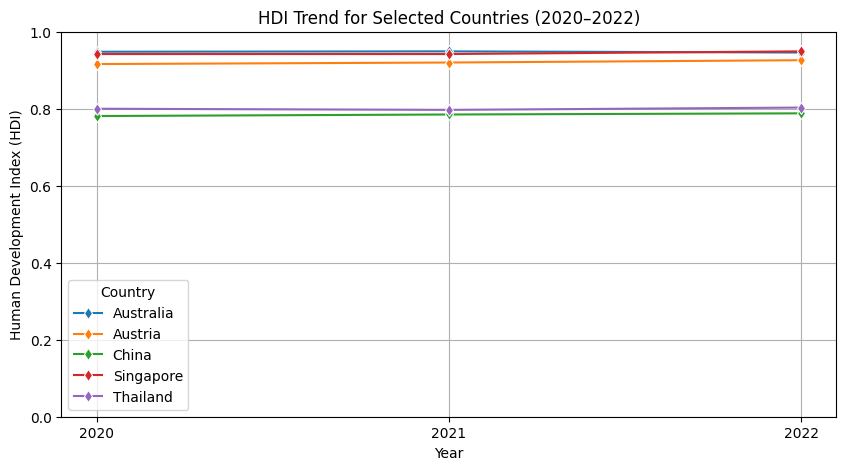

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_countries = ['Australia', 'Austria', 'Thailand', 'China', 'Singapore']

hdi_selected = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(selected_countries)]

plt.figure(figsize=(10,5))

sns.lineplot(data=hdi_selected, x='year', y='hdi', hue='country', marker='d')

plt.title('HDI Trend for Selected Countries (2020–2022)')
plt.xlabel('Year')
plt.ylabel('Human Development Index (HDI)')
plt.xticks([2020, 2021, 2022])
plt.ylim(0, 1)
plt.legend(title='Country')
plt.grid(True)

plt.show()


B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)
∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.

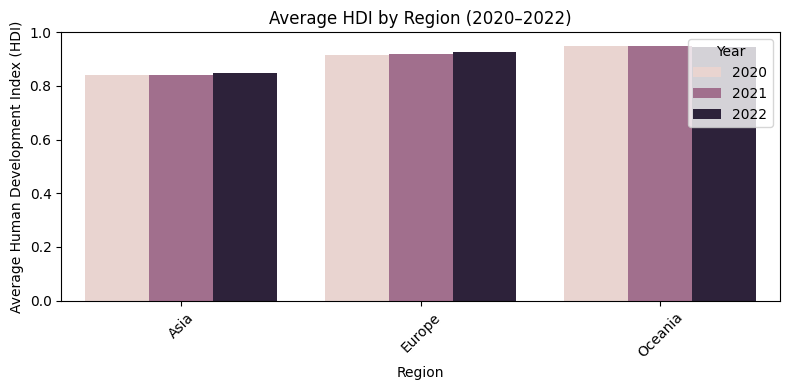

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

country_to_region = {
  'Australia': 'Oceania',
  'Austria': 'Europe',
  'Thailand': 'Asia',
  'China': 'Asia',
  'Singapore': 'Asia',
}

hdi_2020_2022_df['region'] = hdi_2020_2022_df['country'].map(country_to_region)

hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['region'])

region_hdi = hdi_2020_2022_df.groupby(['region', 'year'])['hdi'].mean().reset_index()

plt.figure(figsize=(8,4))

sns.barplot(data=region_hdi, x='region', y='hdi', hue='year')

plt.title('Average HDI by Region (2020–2022)')
plt.xlabel('Region')
plt.ylabel('Average Human Development Index (HDI)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Year')
plt.tight_layout()

plt.show()


Box Plot: HDI Distribution for 2020, 2021, and 2022
∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.

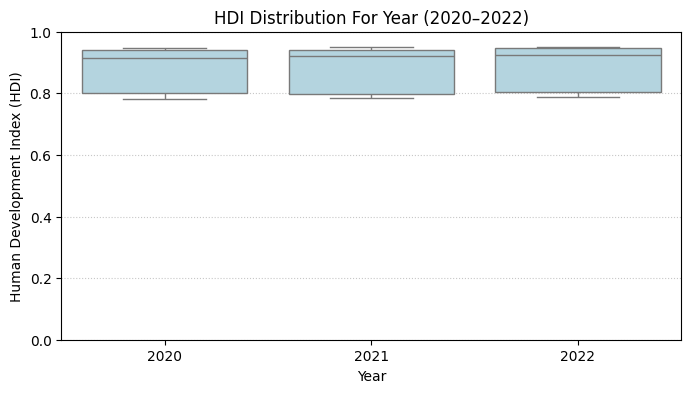

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

hdi_years = hdi_2020_2022_df[hdi_2020_2022_df['year'].isin([2020, 2021, 2022])]

plt.figure(figsize=(8,4))

sns.boxplot(data=hdi_years, x='year', y='hdi', color='lightblue')

plt.title('HDI Distribution For Year (2020–2022)')
plt.xlabel('Year')
plt.ylabel('Human Development Index (HDI)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.show()


Scatter Plot: HDI vs. GNI per Capita
∗ Check if the dataset contains a column for GNI per Capita.
∗ If available:
· Create a scatter plot using HDI as the dependent variable.
· Use GNI per Capita on the x-axis.
· Add a regression line (optional).
∗ If the variable is missing, write:
"GNI per Capita variable not available in the dataset."

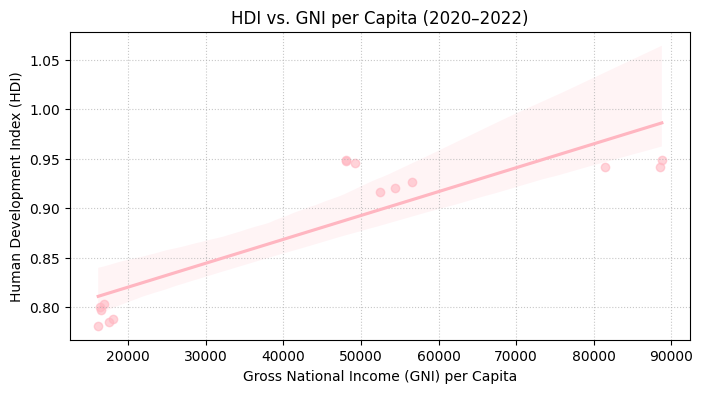

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'gross_inc_percap' in hdi_2020_2022_df.columns:
  plt.figure(figsize=(8,4))

  sns.regplot(data=hdi_2020_2022_df, x='gross_inc_percap', y='hdi', scatter_kws={'alpha':0.6},color='lightpink')

  plt.title('HDI vs. GNI per Capita (2020–2022)')
  plt.xlabel('Gross National Income (GNI) per Capita')
  plt.ylabel('Human Development Index (HDI)')
  plt.grid(True, linestyle=':', alpha=0.7)
  plt.show()
else:
  print("GNI per Capita variable not available in the dataset.")


• Provide brief interpretations of all visualizations, describing major trends, patterns, and anomalies.

Short Analysis Questions:
• Which countries show the greatest improvement in HDI from 2020 to 2022?

In [25]:
hdi_change = hdi_2020_2022_df[hdi_2020_2022_df['year'].isin([2020, 2022])]
hdi_change = hdi_change.pivot(index='country', columns='year', values='hdi')
hdi_change['HDI_change'] = hdi_change[2022] - hdi_change[2020]
top_improvers = hdi_change.sort_values('HDI_change', ascending=False)
top_improvers[['HDI_change']].head(5)


year,HDI_change
country,
Austria,0.010
Singapore,0.007
China,0.007
Thailand,0.003
Australia,-0.002


Austria, China and Singapore shows the greatest improvement in HDI from 2020 to 2022 according to the above table.


• Did any countries experience a decline in HDI? Provide possible reasons.

In [26]:
decliners = hdi_change[hdi_change['HDI_change'] < 0]
decliners[['HDI_change']]


year,HDI_change
country,
Australia,-0.002


Australia expierenced a decline in HDI. The possible reasons for this matter may related to the slowdown in ecocimic,disruption in education sector and also in health care system.

COVID-19 pandemic impacts on health, life expectancy, and education.

Economic recessions reducing income per capita.

Political instability or conflicts affecting public services and well-being.

• Which region has the highest and lowest average HDI across these three years?

In [27]:
region_avg_hdi = hdi_2020_2022_df.groupby('region')['hdi'].mean().sort_values()
region_avg_hdi


,hdi
region,
Asia,0.843000
Europe,0.920667
Oceania,0.947667


From the above data Oceania region has the highest average HDI and Asia region for the lowest average HDI.

Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period

COVID-19 cause significant variation in HDI in 2020-2022. Numerous nations experienced losses because of the decreased life expectancy, decree of learning in school closures and income level barriers as a consequence of economic deceleration. The recovery was delayed, as the developed countries recuperated more rapidly since they had more robust healthcare and economic assistance package whereas the developing countries had lesser recovery rates. Altogether, the pandemic had the interim effect of disrupting the progress of human development on the global arena.

# **Problem 2**



 Advanced HDI Exploration  

1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
• Filter the HDI dataset to include only these countries.
• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [28]:
import pandas as pd

file_path = '/content/drive/MyDrive/Dataset/Human_Development_Index_Dataset.csv'
hdi_df= pd.read_csv(file_path, encoding='latin1')
south_asia_countries = [
  "Afghanistan", "Bangladesh", "Bhutan", "India",
  "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

hdi_southasia_df = hdi_df[hdi_df['country'].isin(south_asia_countries)]

hdi_southasia_df.to_csv("HDI_SouthAsia.csv", index=False)

hdi_southasia_df['country'].unique()


array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

Composite Development Score:
• Create a new metric called Composite Score using the formula:
Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"
• Rank South Asian countries based on Composite Score.
• Plot the top 5 countries in a horizontal bar chart.
• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

hdi_southasia_df = pd.read_csv("HDI_SouthAsia.csv")

hdi_southasia_df['Composite_Score'] = (
  0.30 * hdi_southasia_df['life_expectancy'] +
  0.30 * hdi_southasia_df['gross_inc_percap']
)

hdi_southasia_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809,948.491234
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264,859.190321
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421,756.683396
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022,532.345729
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948,376.051646


In [30]:
southasia_2022 = hdi_southasia_df[hdi_southasia_df['year'] == 2022]

composite_rank = southasia_2022[['country', 'Composite_Score']].sort_values(by='Composite_Score', ascending=False)

print("Ranking by Composite Score (2022):")
print(composite_rank.reset_index(drop=True))


Ranking by Composite Score (2022):
       country  Composite_Score
0     Maldives      5678.289357
1    Sri Lanka      3592.832541
2       Bhutan      3209.130864
3        India      2105.481239
4   Bangladesh      1975.446053
5     Pakistan      1632.210427
6        Nepal      1228.811605
7  Afghanistan       419.425420


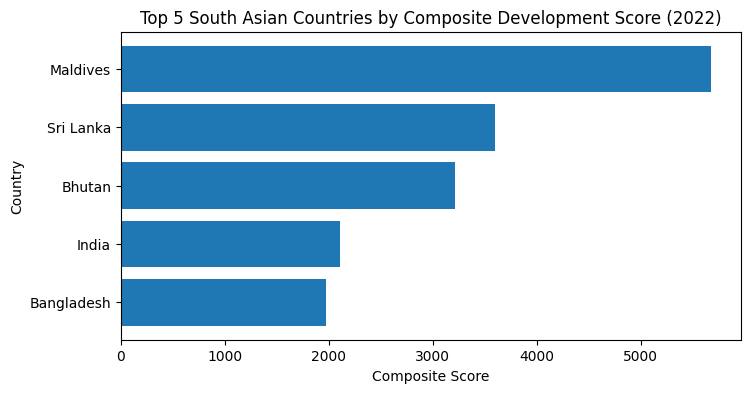

In [31]:
top5 = composite_rank.head(5)

plt.figure(figsize=(8,4))
plt.barh(top5['country'], top5['Composite_Score'])
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Development Score (2022)")
plt.gca().invert_yaxis()
plt.show()


In [32]:
hdi_rank = southasia_2022[['country','hdi']] .sort_values(by='hdi', ascending=False)

print("\nRanking by HDI (2022):")
print(hdi_rank.reset_index(drop=True))



Ranking by HDI (2022):
       country    hdi
0    Sri Lanka  0.780
1     Maldives  0.762
2       Bhutan  0.681
3   Bangladesh  0.670
4        India  0.644
5        Nepal  0.601
6     Pakistan  0.540
7  Afghanistan  0.462


The variations in ranks demonstrate the significance of education in the HDI index. Although the Composite Score primarily focuses on economic and health aspects, a more well-rounded human development indicator is offered by HDI, due to which certain variations in ranks occur.

Outlier Detection:
• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.

In [33]:
southasia_2022 = hdi_southasia_df[hdi_southasia_df['year'] == 2022]

Q1_hdi = southasia_2022['hdi'].quantile(0.25)
Q3_hdi = southasia_2022['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

hdi_outliers = southasia_2022[(southasia_2022['hdi'] < Q1_hdi - 1.5*IQR_hdi) |
                            (southasia_2022['hdi'] > Q3_hdi + 1.5*IQR_hdi)]

Q1_gni = southasia_2022['gross_inc_percap'].quantile(0.25)
Q3_gni = southasia_2022['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

gni_outliers = southasia_2022[(southasia_2022['gross_inc_percap'] < Q1_gni - 1.5*IQR_gni) |
                            (southasia_2022['gross_inc_percap'] > Q3_gni + 1.5*IQR_gni)]

print("HDI Outliers:\n", hdi_outliers[['country', 'hdi']])
print("\nGNI per Capita Outliers:\n", gni_outliers[['country', 'gross_inc_percap']])


HDI Outliers:
 Empty DataFrame
Columns: [country, hdi]
Index: []

GNI per Capita Outliers:
 Empty DataFrame
Columns: [country, gross_inc_percap]
Index: []


• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.

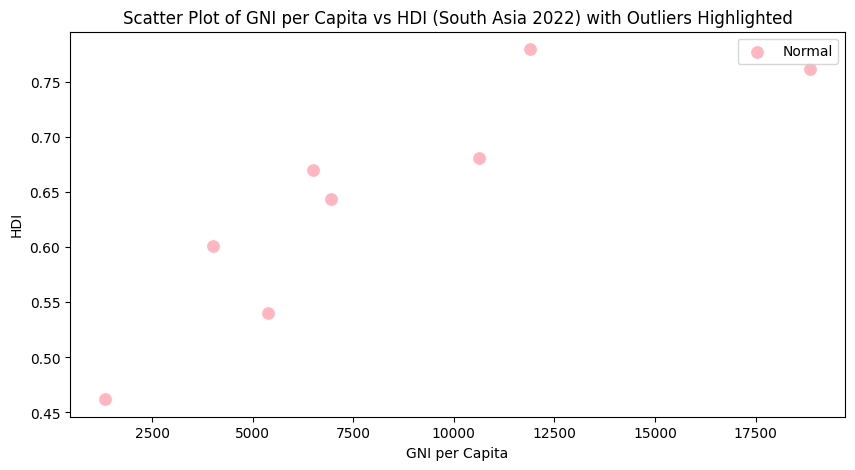

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.scatterplot(data=southasia_2022, x='gross_inc_percap', y='hdi', color='lightpink', s=100, label='Normal')

sns.scatterplot(data=hdi_outliers, x='gross_inc_percap', y='hdi', color='lightblue', s=100, label='HDI Outlier')

sns.scatterplot(data=gni_outliers, x='gross_inc_percap', y='hdi', color='limegreen', s=100, label='GNI Outlier')

plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('Scatter Plot of GNI per Capita vs HDI (South Asia 2022) with Outliers Highlighted')
plt.legend()
plt.show()


• Discuss why the identified countries stand out as outliers.

In South Asia, there were no states identified as outliers either in HDI or GNI per Capita in 2022 with 1.5 × IQR. This implies that the development indicators among all the countries in this subset have comparatively low levels of underdevelopment and overdevelopment. Scatter plot presents an upward tendency in the HDI as the GNI per Capita increases gradually, and there is no extreme outlieer with regard to this trend.

Exploring Metric Relationships:
• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life Expectancy Index {"life expectancy"}).
• Compute Pearson correlation of each metric with HDI.
• Create scatter plots with trendlines to visualize the relationships.



In [35]:
import pandas as pd

hdi_southasia_df = pd.read_csv("HDI_SouthAsia.csv", encoding='latin1')

hdi = hdi_southasia_df['hdi']
gender_dev = hdi_southasia_df['gender_development']
life_exp = hdi_southasia_df['life_expectancy']
print(hdi_southasia_df[['hdi', 'gender_development', 'life_expectancy']].head())


     hdi  gender_development  life_expectancy
0  0.284                 NaN           45.967
1  0.292                 NaN           46.663
2  0.299                 NaN           47.596
3  0.307                 NaN           51.466
4  0.300                 NaN           51.495


In [36]:
df_clean = hdi_southasia_df[['hdi', 'gender_development', 'life_expectancy']].dropna()

hdi = df_clean['hdi']
gender_dev = df_clean['gender_development']
life_exp = df_clean['life_expectancy']

print(f"Number of rows after removing NaNs: {len(df_clean)}")


Number of rows after removing NaNs: 221


In [37]:

corr_gender = hdi.corr(gender_dev)
print(f"HDI & Gender Development: r = {corr_gender:.3f}")

corr_life = hdi.corr(life_exp)
print(f"HDI & Life Expectancy: r = {corr_life:.3f}")


HDI & Gender Development: r = 0.866
HDI & Life Expectancy: r = 0.949


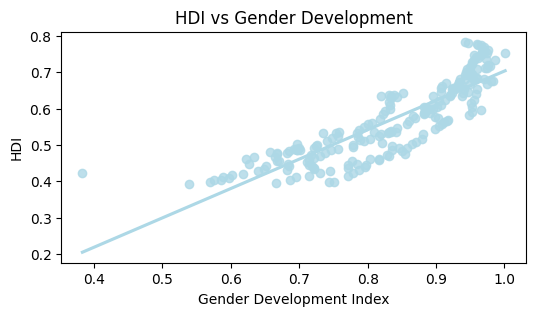

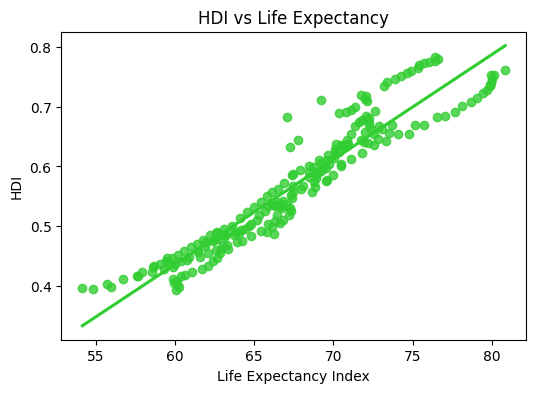

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,3))
sns.regplot(x=gender_dev, y=hdi, ci=None, color='lightblue')
plt.title('HDI vs Gender Development')
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.show()

plt.figure(figsize=(6,4))
sns.regplot(x=life_exp, y=hdi, ci=None, color='limegreen')
plt.title('HDI vs Life Expectancy')
plt.xlabel('Life Expectancy Index')
plt.ylabel('HDI')
plt.show()


• Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

Life Expectancy Index metric is most strongly related to HDI and Gender Development Index shows the weakest relationship with HDI.

Gap Analysis:
• Create a new metric:
GNI HDI Gap = "gross inc percap" − "hdi"
• Rank South Asian countries by GNI HDI Gap in descending and ascending order.
• Plot the top 3 positive gaps and top 3 negative gaps.
• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

In [39]:
import pandas as pd

hdi_southasia_df = pd.read_csv("HDI_SouthAsia.csv", encoding='latin1')

print(hdi_southasia_df[['country', 'hdi', 'gross_inc_percap']].head())

hdi_southasia_df['GNI_HDI_Gap'] = hdi_southasia_df['gross_inc_percap'] - hdi_southasia_df['hdi']

print(hdi_southasia_df[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']].head())


       country    hdi  gross_inc_percap
0  Afghanistan  0.284       3115.670448
1  Afghanistan  0.292       2817.304736
2  Afghanistan  0.299       2474.681985
3  Afghanistan  0.307       1723.019763
4  Afghanistan  0.300       1202.010488
       country  gross_inc_percap    hdi  GNI_HDI_Gap
0  Afghanistan       3115.670448  0.284  3115.386448
1  Afghanistan       2817.304736  0.292  2817.012736
2  Afghanistan       2474.681985  0.299  2474.382985
3  Afghanistan       1723.019763  0.307  1722.712763
4  Afghanistan       1202.010488  0.300  1201.710488


In [40]:
gap_desc = hdi_southasia_df[['country', 'GNI_HDI_Gap']].sort_values(by='GNI_HDI_Gap', ascending=False)
print("Top countries by positive GNI-HDI Gap:")
print(gap_desc.head(3))

gap_asc = hdi_southasia_df[['country', 'GNI_HDI_Gap']].sort_values(by='GNI_HDI_Gap', ascending=True)
print("\nTop countries by negative GNI-HDI Gap:")
print(gap_asc.head(3))


Top countries by positive GNI-HDI Gap:
      country  GNI_HDI_Gap
164  Maldives  18846.03019
161  Maldives  18679.17236
160  Maldives  18054.97765

Top countries by negative GNI-HDI Gap:
        country  GNI_HDI_Gap
11  Afghanistan   980.789554
10  Afghanistan  1047.002686
9   Afghanistan  1121.985570


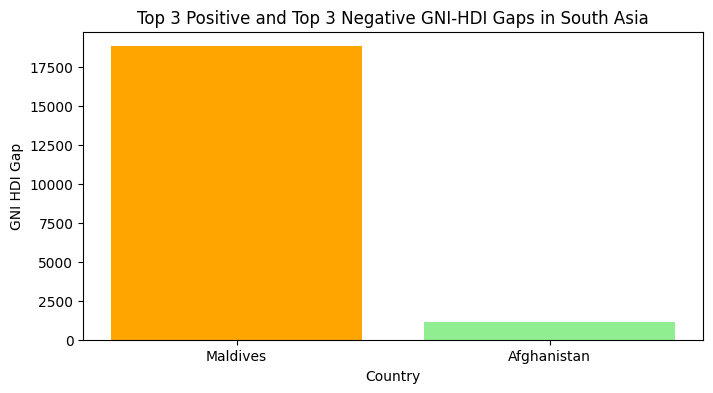

In [41]:
import matplotlib.pyplot as plt

top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)
top_gaps = pd.concat([top_positive, top_negative])

plt.figure(figsize=(8,4))
plt.bar(top_gaps['country'], top_gaps['GNI_HDI_Gap'], color=['orange']*3 + ['lightgreen']*3)
plt.title('Top 3 Positive and Top 3 Negative GNI-HDI Gaps in South Asia')
plt.ylabel('GNI HDI Gap')
plt.xlabel('Country')
plt.show()


**Problem 3 Comparative Regional Analysis: South Asia vs Middle East**

Create Middle East Subset:
• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.
• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.

In [42]:
import pandas as pd

df = pd.read_csv("HDI_problem1B.csv")

In [43]:
middle_east = [
    "Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman",
    "Palestine","Qatar","Saudi Arabia","Syria",
    "United Arab Emirates","Yemen"
]


In [44]:
south_asia = [
    "Afghanistan","Bangladesh","Bhutan","India","Maldives",
    "Nepal","Pakistan","Sri Lanka"
]


In [45]:
df_2020_2022 = df[df["year"].between(2020, 2022)]


In [46]:
south_asia_subset = df_2020_2022[df_2020_2022["country"].isin(south_asia)]
middle_east_subset = df_2020_2022[df_2020_2022["country"].isin(middle_east)]


In [47]:
south_asia_subset.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_subset.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


Descriptive Statistics:
• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.
• Identify which region performs better on average.

In [48]:
import pandas as pd

south_asia = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

south_mean = south_asia["hdi"].mean()
middle_mean = middle_east["hdi"].mean()

south_std = south_asia["hdi"].std()
middle_std = middle_east["hdi"].std()

print("South Asia Mean HDI (2020-2022):", round(south_mean, 4))
print("Middle East Mean HDI (2020-2022):", round(middle_mean, 4))

print("South Asia HDI Std Dev:", round(south_std, 4))
print("Middle East HDI Std Dev:", round(middle_std, 4))

if middle_mean > south_mean:
    print("Middle East performs better on average.")
else:
    print("South Asia performs better on average.")


South Asia Mean HDI (2020-2022): 0.6396
Middle East Mean HDI (2020-2022): 0.7889
South Asia HDI Std Dev: 0.0983
Middle East HDI Std Dev: 0.1413
Middle East performs better on average.


In terms of descriptive statistics, it can be indicated that the Middle East has a much higher mean of HDI (0.7889) than South Asia (0.6396), which means that the human development in the Middle East region is better in 202022.
Nonetheless, the standard deviation of the Middle East (0.1413) is also greater than that of the south Asian (0.983) i.e., the degree of development is more scattered in the middle east region whereas, in South Asian countries, the level remains the same but at a lower level.

Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on HDI.

• Create a bar chart comparing these top and bottom performers across the two regions.

In [49]:
import pandas as pd

south_asia = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

south_group = south_asia.groupby("country")["hdi"].mean().sort_values(ascending=False)

south_top3 = south_group.head(3)
south_bottom3 = south_group.tail(3)

print("Top 3 South Asia Countries:\n", south_top3)
print("\nBottom 3 South Asia Countries:\n", south_bottom3)

middle_group = middle_east.groupby("country")["hdi"].mean().sort_values(ascending=False)

middle_top3 = middle_group.head(3)
middle_bottom3 = middle_group.tail(3)

print("\nTop 3 Middle East Countries:\n", middle_top3)
print("\nBottom 3 Middle East Countries:\n", middle_bottom3)


Top 3 South Asia Countries:
 country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

Bottom 3 South Asia Countries:
 country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64

Top 3 Middle East Countries:
 country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Bottom 3 Middle East Countries:
 country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi, dtype: float64


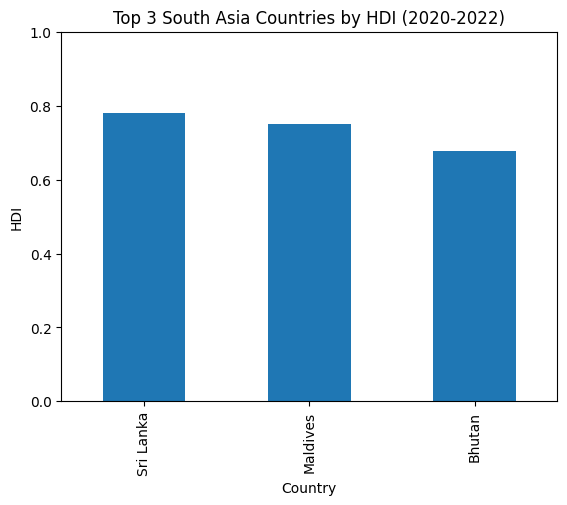

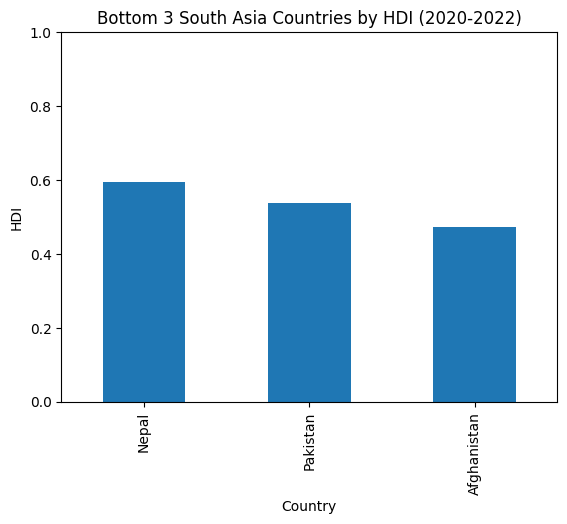

In [50]:
import matplotlib.pyplot as plt

south_top3.plot(kind="bar")
plt.title("Top 3 South Asia Countries by HDI (2020-2022)")
plt.ylabel("HDI")
plt.xlabel("Country")
plt.ylim(0,1)
plt.show()

south_bottom3.plot(kind="bar")
plt.title("Bottom 3 South Asia Countries by HDI (2020-2022)")
plt.ylabel("HDI")
plt.xlabel("Country")
plt.ylim(0,1)
plt.show()


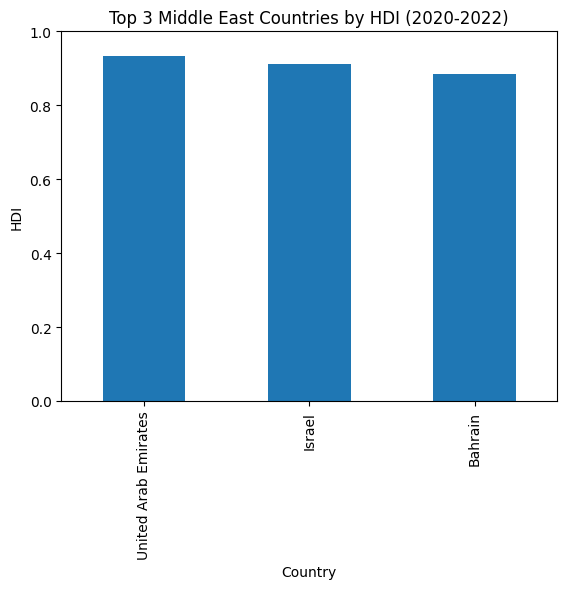

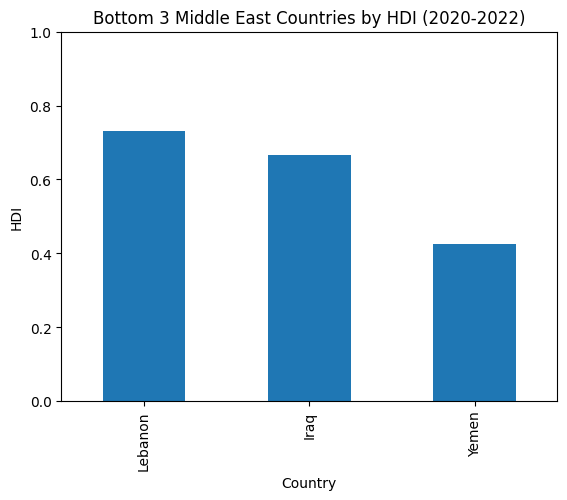

In [51]:
middle_top3.plot(kind="bar")
plt.title("Top 3 Middle East Countries by HDI (2020-2022)")
plt.ylabel("HDI")
plt.xlabel("Country")
plt.ylim(0,1)
plt.show()

middle_bottom3.plot(kind="bar")
plt.title("Bottom 3 Middle East Countries by HDI (2020-2022)")
plt.ylabel("HDI")
plt.xlabel("Country")
plt.ylim(0,1)
plt.show()


Metric Comparisons:
• Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross inc percap"}
• Identify which metric shows the greatest disparity between regions.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

south = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

In [53]:
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

south_means = south.groupby("year")[metrics].mean().mean()
middle_means = middle.groupby("year")[metrics].mean().mean()

print("South Asia Means:\n", south_means)
print("\nMiddle East Means:\n", middle_means)

South Asia Means:
 gender_development       0.881458
life_expectancy         70.970083
gross_inc_percap      7766.509931
dtype: float64

Middle East Means:
 gender_development        0.896545
life_expectancy          75.855455
gross_inc_percap      37750.770520
dtype: float64


In [54]:
comparison = pd.DataFrame({
    "South Asia": south_means,
    "Middle East": middle_means
})

print("\nComparison Table:\n", comparison)


Comparison Table:
                      South Asia   Middle East
gender_development     0.881458      0.896545
life_expectancy       70.970083     75.855455
gross_inc_percap    7766.509931  37750.770520


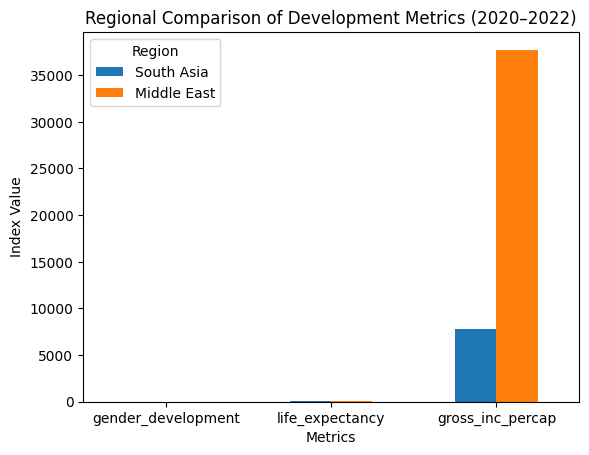

In [55]:
comparison.plot(kind="bar")
plt.title("Regional Comparison of Development Metrics (2020–2022)")
plt.ylabel("Index Value")
plt.xlabel("Metrics")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.show()

In [56]:
diff = (middle_means - south_means).abs()
print("\nDifference Between Regions:\n", diff)
print("\nGreatest disparity metric:", diff.idxmax())


Difference Between Regions:
 gender_development        0.015087
life_expectancy           4.885371
gross_inc_percap      29984.260588
dtype: float64

Greatest disparity metric: gross_inc_percap


Gross_inc_percap shows the greatest disparity metric between regions.

HDI Disparity:
• Compute the range (max – min) of HDI for each region.
• Compute the coefficient of variation (CV = std/mean) for HDI.
• Identify which region exhibits more variation in HDI.

In [57]:
south_mean = south["hdi"].mean()
south_std = south["hdi"].std()
south_max = south["hdi"].max()
south_min = south["hdi"].min()


In [58]:
south_range = south_max - south_min
south_cv = south_std / south_mean

print("South Asia HDI Range:", round(south_range, 4))
print("South Asia HDI CV:", round(south_cv, 4))


South Asia HDI Range: 0.321
South Asia HDI CV: 0.1537


In [59]:
middle_mean = middle["hdi"].mean()
middle_std = middle["hdi"].std()
middle_max = middle["hdi"].max()
middle_min = middle["hdi"].min()

In [60]:

middle_range = middle_max - middle_min
middle_cv = middle_std / middle_mean

In [61]:
print("\nMiddle East HDI Range:", round(middle_range, 4))
print("Middle East HDI CV:", round(middle_cv, 4))



Middle East HDI Range: 0.513
Middle East HDI CV: 0.1791


In [62]:
print("\n--- Comparison ---")
if middle_cv > south_cv:
    print("Middle East shows greater variation in HDI.")
else:
    print("South Asia shows greater variation in HDI.")


--- Comparison ---
Middle East shows greater variation in HDI.


The Middle East exhibits greater HDI disparity than South Asia.
It has a higher HDI range (0.513 vs 0.321) and a higher coefficient of variation (0.1791 vs 0.1537), indicating that although the Middle East has a higher average HDI, development within the region is more uneven, with extremely high-performing countries and very low-performing countries.
In contrast, South Asia shows comparatively lower HDI but relatively more consistent development levels across countries.

6. Correlation Analysis:
• For each region, compute correlations of HDI with:
– Gender Development Index
– Life Expectancy Index
• Create scatter plots with trendlines for each correlation.
• Interpret the strength and direction of these relationships.

In [63]:
import numpy as np

def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    return numerator / denominator

print("---- South Asia Correlations ----")
for m in metrics:
    r = pearson_corr(south["hdi"], south[m])
    print(m, "vs HDI:", round(r, 4))

print("\n---- Middle East Correlations ----")
for m in metrics:
    r = pearson_corr(middle["hdi"], middle[m])
    print(m, "vs HDI:", round(r, 4))

---- South Asia Correlations ----
gender_development vs HDI: 0.8742
life_expectancy vs HDI: 0.9388
gross_inc_percap vs HDI: 0.8865

---- Middle East Correlations ----
gender_development vs HDI: 0.9357
life_expectancy vs HDI: 0.9331
gross_inc_percap vs HDI: 0.7568


In [64]:
def scatter_with_trend(df, x, y, title):
    plt.figure(figsize=(6,4))
    plt.scatter(df[x], df[y], color="skyblue")

    m, b = np.polyfit(df[x], df[y], 1)
    plt.plot(df[x], m*df[x] + b, color="lightpink", linewidth=2)

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

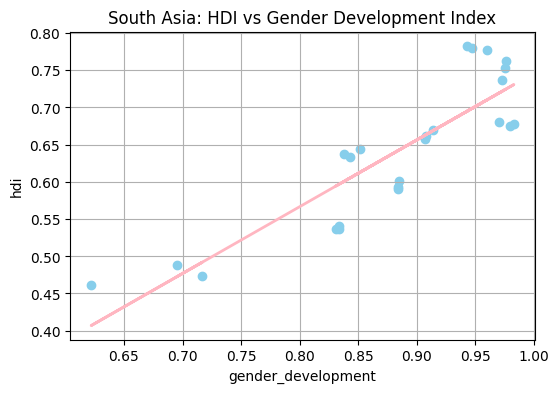

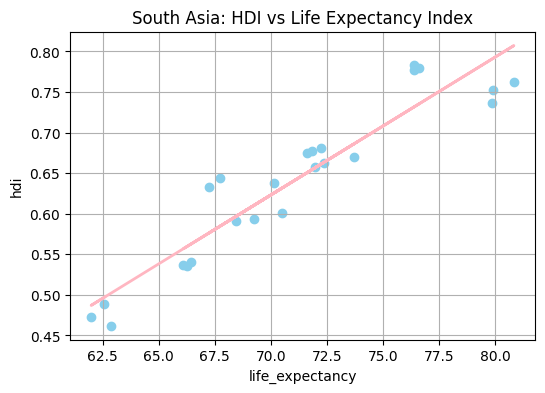

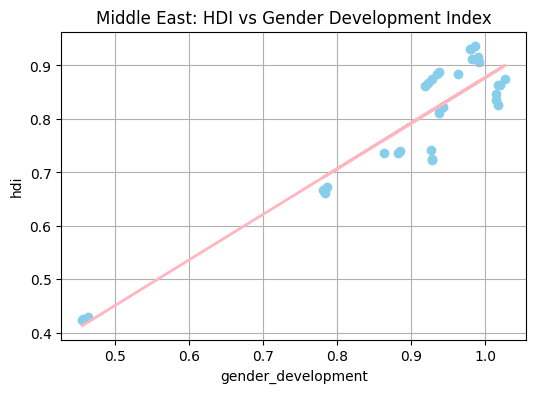

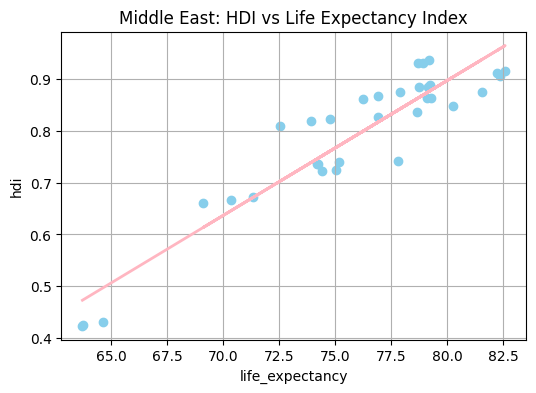

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


scatter_with_trend(south, "gender_development", "hdi",
                   "South Asia: HDI vs Gender Development Index")

scatter_with_trend(south, "life_expectancy", "hdi",
                   "South Asia: HDI vs Life Expectancy Index")

scatter_with_trend(middle, "gender_development", "hdi",
                   "Middle East: HDI vs Gender Development Index")

scatter_with_trend(middle, "life_expectancy", "hdi",
                   "Middle East: HDI vs Life Expectancy Index")


The standard of HDI has a strong positive correlation with Gender Development Index (GDI)as well as Life Expectancy Index (LEI)in South Asia and the Middle East. The greater the level of gender equity and life expectancy, the higher the levels of HDI. In South Asia, the highest contribution to HDI is made by Life Expectancy, whereas in the Middle East both measures have an almost equal effect. The positive relationships between the variables are strong and these are validated by the scatter plots that have red trendlines.

Outlier Detection:
• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.
• Create scatter plots highlighting outliers in a different color.
• Discuss the significance of these outliers.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

south = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

for col in ["hdi", "gross_inc_percap"]:
  south[col] = pd.to_numeric(south[col], errors='coerce')
  middle[col] = pd.to_numeric(middle[col], errors='coerce')

def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  outliers = df[(df[column] < lower) | (df[column] > upper)]
  return outliers

south_hdi_outliers = detect_outliers(south, "hdi")
south_gni_outliers = detect_outliers(south, "gross_inc_percap")

middle_hdi_outliers = detect_outliers(middle, "hdi")
middle_gni_outliers = detect_outliers(middle, "gross_inc_percap")

print("South Asia HDI Outliers:\n", south_hdi_outliers[["country","hdi"]])
print("South Asia GNI Outliers:\n", south_gni_outliers[["country","gross_inc_percap"]])

print("\nMiddle East HDI Outliers:\n", middle_hdi_outliers[["country","hdi"]])
print("Middle East GNI Outliers:\n", middle_gni_outliers[["country","gross_inc_percap"]])


South Asia HDI Outliers:
 Empty DataFrame
Columns: [country, hdi]
Index: []
South Asia GNI Outliers:
 Empty DataFrame
Columns: [country, gross_inc_percap]
Index: []

Middle East HDI Outliers:
    country    hdi
30   Yemen  0.430
31   Yemen  0.425
32   Yemen  0.424
Middle East GNI Outliers:
 Empty DataFrame
Columns: [country, gross_inc_percap]
Index: []


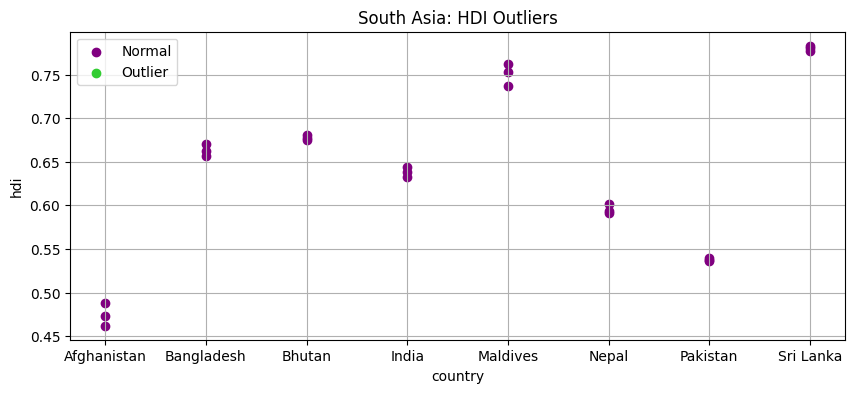

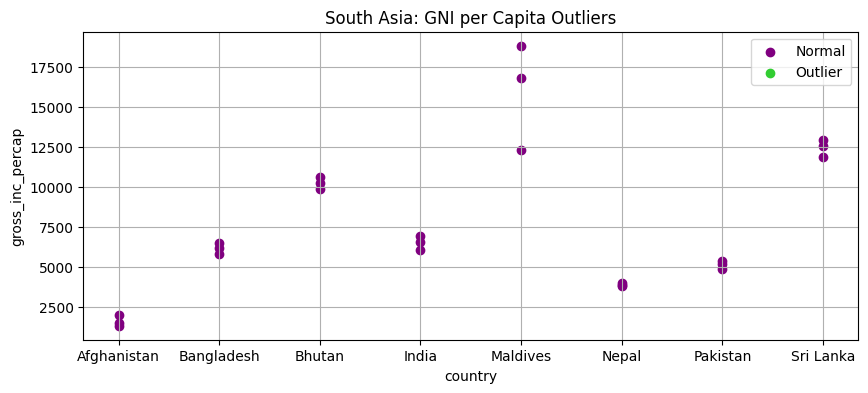

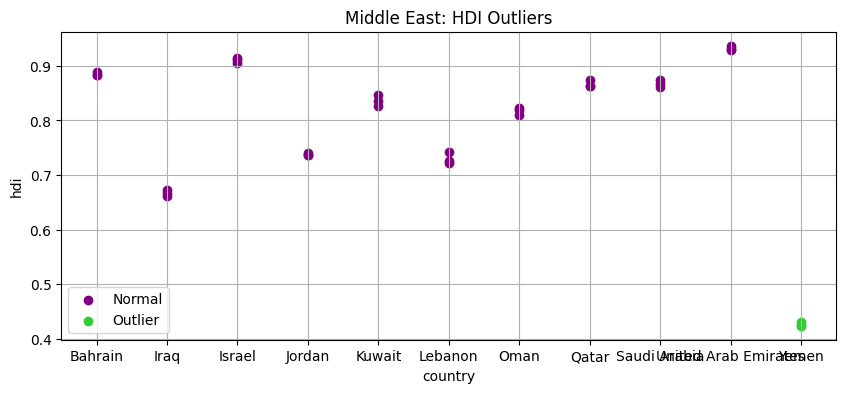

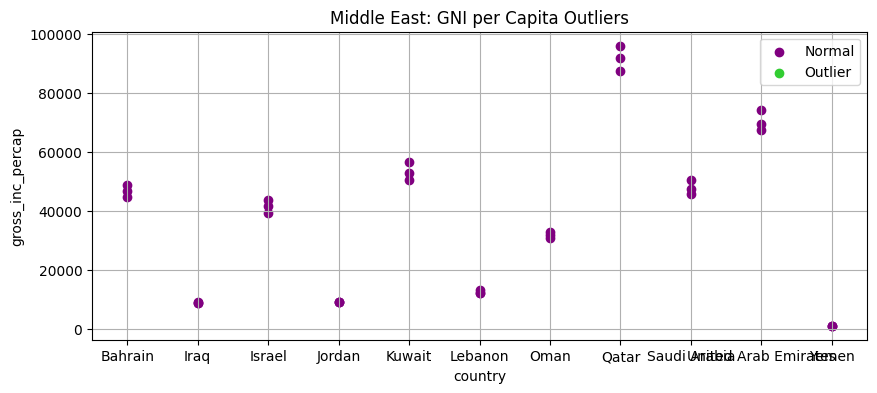

In [67]:
def plot_outliers(df, x, y, title):
    plt.figure(figsize=(10,4))

    # Non-outliers
    non_out = df.copy()
    Q1 = df[y].quantile(0.25)
    Q3 = df[y].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[(df[y] < lower) | (df[y] > upper)]
    non_out = df[(df[y] >= lower) & (df[y] <= upper)]

    plt.scatter(non_out[x], non_out[y], color="purple", label="Normal")
    plt.scatter(outliers[x], outliers[y], color="limegreen", label="Outlier")

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.grid(True)
    plt.show()

# ---- South Asia ----
plot_outliers(south, "country", "hdi", "South Asia: HDI Outliers")
plot_outliers(south, "country", "gross_inc_percap", "South Asia: GNI per Capita Outliers")

# ---- Middle East ----
plot_outliers(middle, "country", "hdi", "Middle East: HDI Outliers")
plot_outliers(middle, "country", "gross_inc_percap", "Middle East: GNI per Capita Outliers")


There were also no outliers of HDI or GNI in South Asia and this implies that there is relative uniformity in the development within the region.
Yemen seems like a serious HDI outlier in the Middle East, which shows the major problems in human development the country has to face.
What is significant about outliers is that they point to extreme events and indicate regional disparity and assist the policy makers to concentrate on the intervention that should be done to those countries that are way out of the regional average.